<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/Modelo_entrenamiento--DS002-D006-%3ED012--test02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib

path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)

from google.colab import drive
drive.mount('/content/drive')

batch_size = 32
img_height = 180
img_width = 180

#-------------------------------------------------------------------------------
# def obtenerTimer():
#   class TimingCallback(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.times = []
#     def on_epoch_begin(self, batch, logs={}):
#         self.epoch_time_start = time()
#     def on_epoch_end(self, batch, logs={}):
#         self.times.append(time() - self.epoch_time_start)
#   cb = TimingCallback()
#   return cb

class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
#-------------------------------------------------------------------------------

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelos

### Modelo DS002-D006

In [ ]:
#-------------------------------------------------------------------------------
cb_D006 = obtenerTimer()
num_classes = 5
epochs=15

model_D006 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_D006.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D006.summary()


history_D006 = model_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D006]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 125s 83ms/step - loss: 3.5555 - accuracy: 0.4663 - val_loss: 1.2042 - val_accuracy: 0.5052
Epoch 2/15
1497/1497 [==============================] - 125s 83ms/step - loss: 0.8522 - accuracy: 0.6410 - val_loss: 0.6856 - val_accuracy: 0.7143
Epoch 3/15
1497/1497 [==============================] - 125s 83ms/step - loss: 0.5717 - accuracy: 0.7703 - val_loss: 0.5124 - val_accuracy: 0.8046
Epoch 4/15
1497/1497 [==============================] - 126s 84ms/step - loss: 0.4318 - accuracy: 0.8384 - val_loss: 0.4309 - val_accuracy: 0.8395
Epoch 5/15
1497/1497 [==============================] - 124s 83ms/step - loss: 0.3535 - accuracy: 0.8698 - val_loss: 0.4253 - val_accuracy: 0.8468
Epoch 6/15
1497/1497 [==============================] - 124s 83ms/step - loss: 0.2901 - accuracy: 0.8944 - val_loss: 0.4263 - val_accuracy: 0.8533
Epoch 7/15
1497/1497 [==============================] - 124s 83ms/step - loss: 0.2476 - accuracy: 0.9117 - val_loss: 0

[124.5875141620636, 124.62180519104004, 124.91234135627747, 125.72111797332764, 124.38647031784058, 124.08173966407776, 124.17187261581421, 125.06099796295166, 125.8032615184784, 125.14837431907654, 125.11529874801636, 126.07570958137512, 125.74161791801453, 125.04638576507568, 125.66649460792542]
El entrenamiento se demoro: 1876.141001701355 segundos
El entrenamiento se demoro: 31.269016695022582 minutos
accuracy => 0.9680806398391724
loss => 0.09269444644451141
val_accuracy => 0.8729853630065918
val_loss => 0.4253235459327698


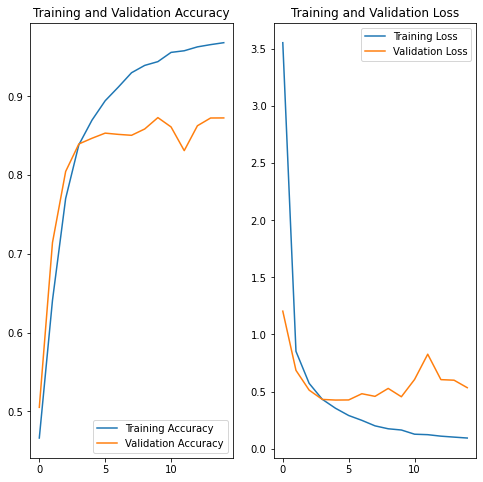

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D006.times)
final_time = 0
for time in cb_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D006.history['accuracy'])))
print('loss => '+ str(min(history_D006.history['loss'])))
print('val_accuracy => '+ str(max(history_D006.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D006.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D006.history['accuracy']
val_acc = history_D006.history['val_accuracy']

loss=history_D006.history['loss']
val_loss=history_D006.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D007

In [ ]:
#-------------------------------------------------------------------------------
cb_D007 = obtenerTimer()
num_classes = 5
epochs=15

model_D007 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])
model_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D007.summary()


history_D007 = model_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 125s 83ms/step - loss: 1.4480 - accuracy: 0.4083 - val_loss: 1.2513 - val_accuracy: 0.5025
Epoch 2/15
1497/1497 [==============================] - 125s 83ms/step - loss: 1.1391 - accuracy: 0.5261 - val_loss: 1.0379 - val_accuracy: 0.5701
Epoch 3/15
1497/1497 [==============================] - 125s 83ms/step - loss: 0.9157 - accuracy: 0.6285 - val_loss: 0.7211 - val_accuracy: 0.7206
Epoch 4/15
1497/1497 [==============================] - 125s 83ms/step - loss: 0.6358 - accuracy: 0.7662 - val_loss: 0.5812 - val_accuracy: 0.7964
Epoch 5/15
1497/1497 [==============================] - 126s 84ms/step - loss: 0.5191 - accuracy: 0.8118 - val_loss: 0.4907 - val_accuracy: 0.8179
Epoch 6/15
1497/1497 [==============================] - 126s 84ms/step - loss: 0.4525 - accuracy: 0.8338 - val_loss: 0.4781 - val_accuracy: 0.8306
Epoch 7/15
1497/1497 [==============================] - 125s 83ms/step - loss: 0.4152 - accuracy: 0.8462 - val_loss: 0

[125.31217741966248, 124.81165528297424, 125.00135922431946, 124.88372254371643, 125.87622141838074, 125.60690832138062, 125.18633222579956, 125.2279942035675, 124.9782886505127, 125.3760313987732, 125.28578758239746, 125.13905739784241, 125.34680104255676, 127.38524723052979, 126.37575173377991]
El entrenamiento se demoro: 1881.7933356761932 segundos
El entrenamiento se demoro: 31.363222261269886 minutos
accuracy => 0.8896705508232117
loss => 0.29498958587646484
val_accuracy => 0.8638830780982971
val_loss => 0.3755190968513489


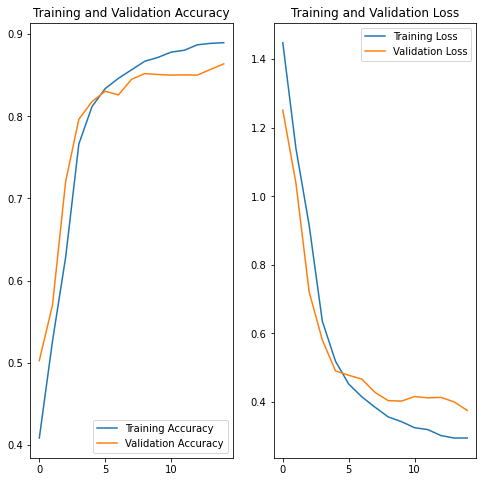

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D007.times)
final_time = 0
for time in cb_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D007.history['accuracy'])))
print('loss => '+ str(min(history_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D007.history['accuracy']
val_acc = history_D007.history['val_accuracy']

loss=history_D007.history['loss']
val_loss=history_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D008

In [ ]:
#-------------------------------------------------------------------------------
cb_D008 = TimingCallback()
num_classes = 5
epochs=10

model_D008 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D008.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D008.summary()


history_D008 = model_D008.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D008]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 8258s 5s/step - loss: 1.5609 - accuracy: 0.3270 - val_loss: 1.5581 - val_accuracy: 0.3240
Epoch 2/10
1497/1497 [==============================] - 149s 99ms/step - loss: 1.5570 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 3/10
1497/1497 [==============================] - 149s 99ms/step - loss: 1.5566 - accuracy: 0.3270 - val_loss: 1.5581 - val_accuracy: 0.3240
Epoch 4/10
1497/1497 [==============================] - 149s 99ms/step - loss: 1.5566 - accuracy: 0.3270 - val_loss: 1.5582 - val_accuracy: 0.3240
Epoch 5/10
1497/1497 [==============================] - 148s 98ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 6/10
1497/1497 [==============================] - 148s 98ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 7/10
1497/1497 [==============================] - 150s 100ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1

[8258.161492109299, 149.35745191574097, 148.82466173171997, 149.02362251281738, 147.89507865905762, 147.5060715675354, 149.53644633293152, 149.56442523002625, 148.5984354019165, 149.87941026687622]
El entrenamiento se demoro: 9598.34709572792 segundos
El entrenamiento se demoro: 159.97245159546534 minutos
accuracy => 0.3270009458065033
loss => 1.556563377380371
val_accuracy => 0.32400834560394287
val_loss => 1.5577738285064697


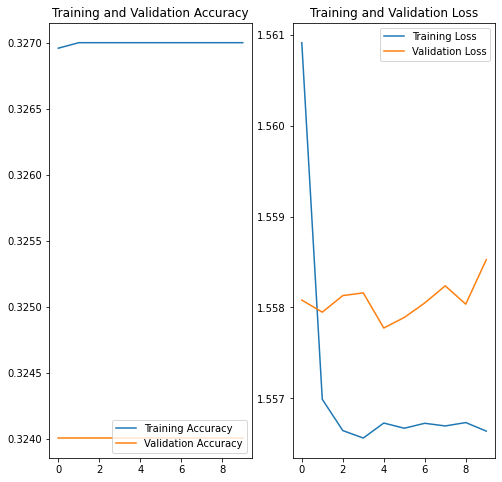

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D008.times)
final_time = 0
for time in cb_D008.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D008.history['accuracy'])))
print('loss => '+ str(min(history_D008.history['loss'])))
print('val_accuracy => '+ str(max(history_D008.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D008.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D008.history['accuracy']
val_acc = history_D008.history['val_accuracy']

loss=history_D008.history['loss']
val_loss=history_D008.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D009

In [ ]:
#-------------------------------------------------------------------------------
cb_D009 = TimingCallback()
num_classes = 5
epochs=10

model_D009 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D009.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D009.summary()


history_D009 = model_D009.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D009]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 148s 98ms/step - loss: 1.5737 - accuracy: 0.3270 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 2/10
1497/1497 [==============================] - 149s 99ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 3/10
1497/1497 [==============================] - 148s 98ms/step - loss: 1.5566 - accuracy: 0.3270 - val_loss: 1.5581 - val_accuracy: 0.3240
Epoch 4/10
1497/1497 [==============================] - 149s 99ms/step - loss: 1.5566 - accuracy: 0.3270 - val_loss: 1.5582 - val_accuracy: 0.3240
Epoch 5/10
1497/1497 [==============================] - 148s 99ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 6/10
1497/1497 [==============================] - 150s 100ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 7/10
1497/1497 [==============================] - 153s 102ms/step - loss: 1.5567 - accuracy: 0.3270 - val_loss:

[147.74292993545532, 148.89957642555237, 147.86293029785156, 148.69987893104553, 148.1147060394287, 149.5368685722351, 153.10755491256714, 149.6223087310791, 150.67196440696716, 151.64871621131897]
El entrenamiento se demoro: 1495.907434463501 segundos
El entrenamiento se demoro: 24.931790574391684 minutos
accuracy => 0.3270009458065033
loss => 1.556561827659607
val_accuracy => 0.32400834560394287
val_loss => 1.5577738285064697


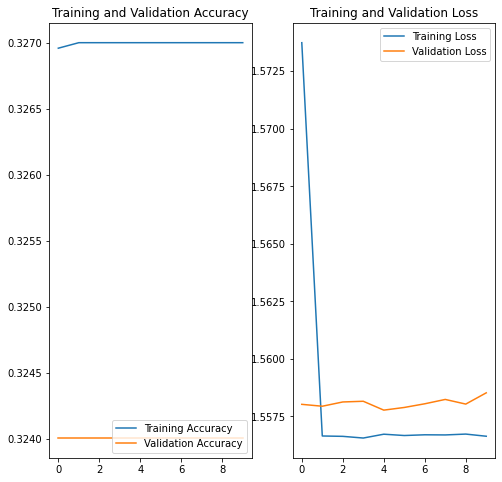

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D009.times)
final_time = 0
for time in cb_D009.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D009.history['accuracy'])))
print('loss => '+ str(min(history_D009.history['loss'])))
print('val_accuracy => '+ str(max(history_D009.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D009.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D009.history['accuracy']
val_acc = history_D009.history['val_accuracy']

loss=history_D009.history['loss']
val_loss=history_D009.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D010

In [ ]:
#-------------------------------------------------------------------------------
cb_D010 = TimingCallback()
num_classes = 5
epochs=10

model_D010 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D010.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D010.summary()


history_D010 = model_D010.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D010]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 151s 100ms/step - loss: 1.5553 - accuracy: 0.3309 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 2/10
1497/1497 [==============================] - 147s 98ms/step - loss: 1.5561 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 3/10
1497/1497 [==============================] - 149s 100ms/step - loss: 1.5560 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 4/10
1497/1497 [==============================] - 152s 101ms/step - loss: 1.5560 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 5/10
1497/1497 [==============================] - 152s 101ms/step - loss: 1.5561 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 6/10
1497/1497 [==============================] - 152s 101ms/step - loss: 1.5560 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 7/10
1497/1497 [==============================] - 152s 101ms/step - loss: 1.5560 - accuracy: 0.3270 - val_l

[150.94607067108154, 147.38671684265137, 149.49087119102478, 151.87871956825256, 152.33053183555603, 152.27137804031372, 151.5805184841156, 151.66408443450928, 150.02705359458923, 163.29047894477844]
El entrenamiento se demoro: 1520.8664236068726 segundos
El entrenamiento se demoro: 25.34777372678121 minutos
accuracy => 0.3308838903903961
loss => 1.5553361177444458
val_accuracy => 0.32400834560394287
val_loss => 1.5576510429382324


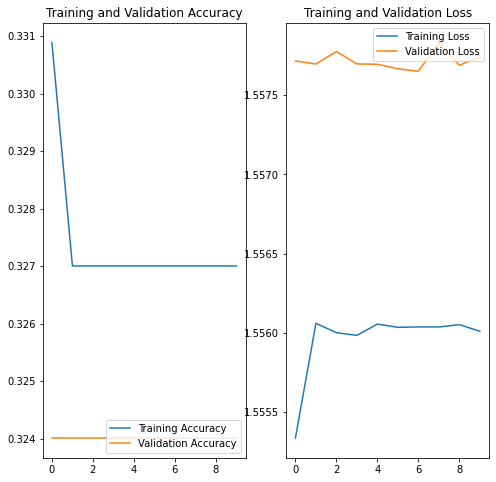

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D010.times)
final_time = 0
for time in cb_D010.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D010.history['accuracy'])))
print('loss => '+ str(min(history_D010.history['loss'])))
print('val_accuracy => '+ str(max(history_D010.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D010.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D010.history['accuracy']
val_acc = history_D010.history['val_accuracy']

loss=history_D010.history['loss']
val_loss=history_D010.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D011

In [ ]:
#-------------------------------------------------------------------------------
cb_D011 = TimingCallback()
num_classes = 5
epochs=15

model_D011 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D011.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D011.summary()


history_D011 = model_D011.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D011]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 152s 101ms/step - loss: 1.5628 - accuracy: 0.3252 - val_loss: 1.5581 - val_accuracy: 0.3240
Epoch 2/15
1497/1497 [==============================] - 150s 100ms/step - loss: 1.5568 - accuracy: 0.3270 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 3/15
1497/1497 [==============================] - 150s 100ms/step - loss: 0.9665 - accuracy: 0.6107 - val_loss: 0.7290 - val_accuracy: 0.7187
Epoch 4/15
1497/1497 [==============================] - 149s 99ms/step - loss: 0.6907 - accuracy: 0.7289 - val_loss: 0.6482 - val_accuracy: 0.7442
Epoch 5/15
1497/1497 [==============================] - 148s 99ms/step - loss: 0.6081 - accuracy: 0.7607 - val_loss: 0.6150 - val_accuracy: 0.7542
Epoch 6/15
1497/1497 [==============================] - 150s 100ms/step - loss: 0.5429 - accuracy: 0.7879 - val_loss: 0.5365 - val_accuracy: 0.7882
Epoch 7/15
1497/1497 [==============================] - 150s 100ms/step - loss: 0.4969 - accuracy: 0.8101 - val_lo

[152.00828909873962, 150.19997096061707, 150.4161605834961, 149.37600183486938, 148.04208946228027, 149.5768837928772, 149.5919439792633, 150.15266609191895, 150.48944330215454, 153.62443017959595, 153.5682463645935, 153.32727313041687, 151.8410131931305, 151.39194917678833, 152.4945662021637]
El entrenamiento se demoro: 2266.1009273529053 segundos
El entrenamiento se demoro: 37.76834878921509 minutos
accuracy => 0.8923218250274658
loss => 0.2979612946510315
val_accuracy => 0.8397494554519653
val_loss => 0.4182772934436798


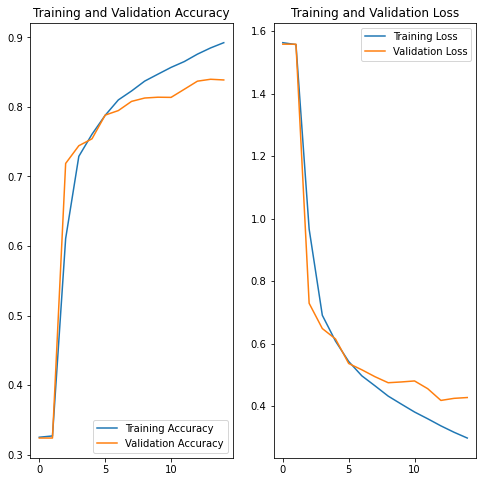

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D011.times)
final_time = 0
for time in cb_D011.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D011.history['accuracy'])))
print('loss => '+ str(min(history_D011.history['loss'])))
print('val_accuracy => '+ str(max(history_D011.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D011.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D011.history['accuracy']
val_acc = history_D011.history['val_accuracy']

loss=history_D011.history['loss']
val_loss=history_D011.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D012

In [ ]:
#-------------------------------------------------------------------------------
cb_D012 = TimingCallback()
num_classes = 5
epochs=15

model_D012 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D012.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D012.summary()


history_D012 = model_D012.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D012]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 151s 100ms/step - loss: 1.5672 - accuracy: 0.3269 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 2/15
1497/1497 [==============================] - 150s 100ms/step - loss: 1.5565 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 3/15
1497/1497 [==============================] - 151s 101ms/step - loss: 1.5565 - accuracy: 0.3270 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 4/15
1497/1497 [==============================] - 151s 101ms/step - loss: 1.5564 - accuracy: 0.3270 - val_loss: 1.5580 - val_accuracy: 0.3240
Epoch 5/15
1497/1497 [==============================] - 154s 103ms/step - loss: 1.5566 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 6/15
1497/1497 [==============================] - 152s 101ms/step - loss: 1.5565 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 7/15
1497/1497 [==============================] - 153s 102ms/step - loss: 1.5565 - accuracy: 0.3270 - val_

[150.9944143295288, 150.04651808738708, 151.33572435379028, 151.42562747001648, 154.02259159088135, 151.91391777992249, 152.94463562965393, 154.44411611557007, 154.88644289970398, 154.6444764137268, 154.48003792762756, 154.06676530838013, 154.24722266197205, 153.4781174659729, 152.30281925201416]
El entrenamiento se demoro: 2295.233427286148 segundos
El entrenamiento se demoro: 38.253890454769135 minutos
accuracy => 0.3270009458065033
loss => 1.5564167499542236
val_accuracy => 0.32400834560394287
val_loss => 1.557576298713684


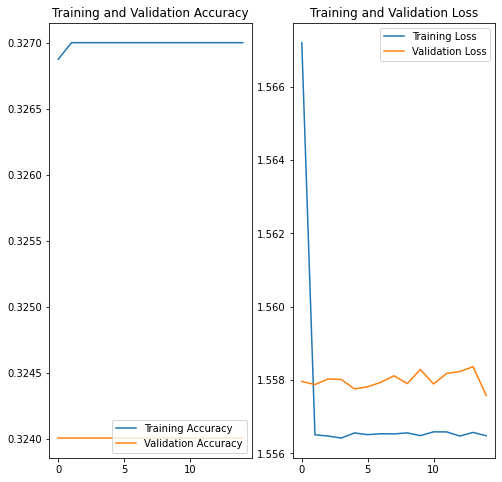

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D012.times)
final_time = 0
for time in cb_D012.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D012.history['accuracy'])))
print('loss => '+ str(min(history_D012.history['loss'])))
print('val_accuracy => '+ str(max(history_D012.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D012.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D012.history['accuracy']
val_acc = history_D012.history['val_accuracy']

loss=history_D012.history['loss']
val_loss=history_D012.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


### Modelo DS002-D013

In [ ]:
#-------------------------------------------------------------------------------
cb_D013 = TimingCallback()
num_classes = 5
epochs=15

model_D013 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D013.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D013.summary()


history_D013 = model_D013.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D013]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 148s 98ms/step - loss: 1.5574 - accuracy: 0.3266 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 2/15
1497/1497 [==============================] - 148s 98ms/step - loss: 1.5562 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 3/15
1497/1497 [==============================] - 148s 98ms/step - loss: 1.5562 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 4/15
1497/1497 [==============================] - 149s 99ms/step - loss: 1.5561 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 5/15
1497/1497 [==============================] - 149s 99ms/step - loss: 1.5562 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 6/15
1497/1497 [==============================] - 149s 99ms/step - loss: 1.5562 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 7/15
1497/1497 [==============================] - 150s 100ms/step - loss: 1.5562 - accuracy: 0.3270 - val_loss: 

[147.62568926811218, 147.983140707016, 147.6182496547699, 148.71234560012817, 148.68483877182007, 148.99423050880432, 149.5415711402893, 148.9040331840515, 149.2601203918457, 147.87075901031494, 147.60722947120667, 148.77856278419495, 147.94926381111145, 147.9989035129547, 146.7899260520935]
El entrenamiento se demoro: 2224.3188638687134 segundos
El entrenamiento se demoro: 37.07198106447856 minutos
accuracy => 0.3270009458065033
loss => 1.5560847520828247
val_accuracy => 0.32400834560394287
val_loss => 1.5575814247131348


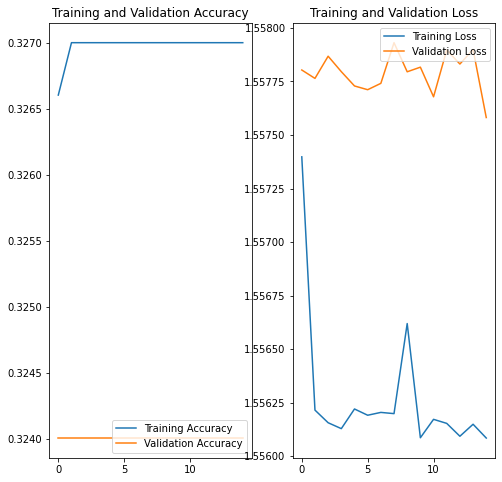

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D013.times)
final_time = 0
for time in cb_D013.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D013.history['accuracy'])))
print('loss => '+ str(min(history_D013.history['loss'])))
print('val_accuracy => '+ str(max(history_D013.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D013.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D013.history['accuracy']
val_acc = history_D013.history['val_accuracy']

loss=history_D013.history['loss']
val_loss=history_D013.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modelo DS002-D011 - test

In [ ]:
#-------------------------------------------------------------------------------

cb_D011 = TimingCallback()
num_classes = 5
epochs=10

model_D011 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_D011.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_D011.summary()


history_D011 = model_D011.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_D011]
)

#-------------------------------------------------------------------------------

Epoch 1/10
1497/1497 [==============================] - 130s 86ms/step - loss: 1.5612 - accuracy: 0.3254 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 2/10
1497/1497 [==============================] - 128s 85ms/step - loss: 1.5563 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 3/10
1497/1497 [==============================] - 130s 87ms/step - loss: 1.5562 - accuracy: 0.3270 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 4/10
1497/1497 [==============================] - 130s 87ms/step - loss: 1.5562 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 5/10
1497/1497 [==============================] - 132s 88ms/step - loss: 1.5563 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 6/10
1497/1497 [==============================] - 131s 87ms/step - loss: 1.5563 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 7/10
1497/1497 [==============================] - 130s 87ms/step - loss: 1.5563 - accuracy: 0.3270 - val_loss: 1

[18932.83601951599, 122.39334392547607, 123.9409704208374, 124.50275921821594, 124.97942566871643, 124.01457619667053, 123.64571213722229, 123.12048292160034, 123.17234373092651, 123.20459342002869, 123.48694658279419, 124.07241916656494, 122.67541241645813, 124.23847961425781, 123.48125886917114, 123.17460370063782, 124.12678360939026, 123.79286885261536, 124.01437735557556, 124.33127737045288, 125.18298006057739, 120.65719389915466, 122.19855809211731, 124.56816697120667, 123.12620902061462, 125.19727516174316, 125.41522765159607, 125.62108016014099, 126.5608241558075, 127.13342690467834]
El entrenamiento se demoro: 22528.86559677124 segundos
El entrenamiento se demoro: 375.4810932795207 minutos
accuracy => 0.3270009458065033
loss => 1.5563980340957642
val_accuracy => 0.32400834560394287
val_loss => 1.5575770139694214


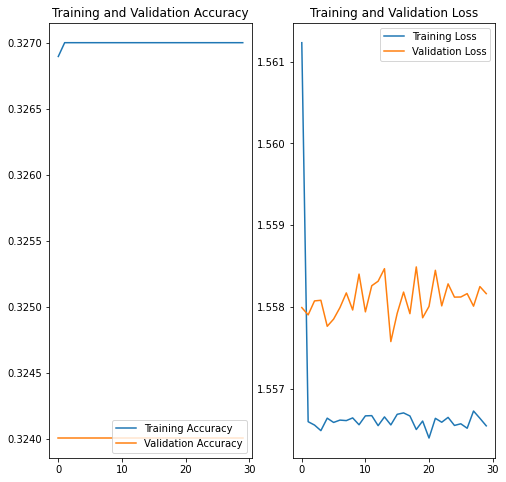

In [ ]:
#-------------------------------------------------------------------------------

print(cb_D011.times)
final_time = 0
for time in cb_D011.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_D011.history['accuracy'])))
print('loss => '+ str(min(history_D011.history['loss'])))
print('val_accuracy => '+ str(max(history_D011.history['val_accuracy'])))
print('val_loss => '+ str(min(history_D011.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_D011.history['accuracy']
val_acc = history_D011.history['val_accuracy']

loss=history_D011.history['loss']
val_loss=history_D011.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()